# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Trends

1. There is a high correlation between latitude and temperature.  This is corroborated by the fact that the most direct rays of the sun strike the earth around the equator (0 degrees latitude) which results in the greatest concentration of heat in this area of the earth.  As we move away from the equator in both directions (north and south), the suns rays hit less directly resulting in lower concentrations of heat and temperatures decrease.

2. The correlation between latitude and maximum temperature is stronger in the northern hemisphere than the southern hemisphere.  This makes sense considering it is winter in the northern hemisphere and summer in the southern hemisphere and we see temperatures drop more dramatically as we move away from the equator in the north.  Maximum temperatures in the southern hemisphere are on average warmer with the mean temperature at 74 degrees compared to a mean of 34 degrees in the northern hemisphere.  As a result, you see temperatures drop more dramatically as distance from the equator increases in the northern hemisphere while there is less variation in temperatures in southern hemisphere cities in the summer months.  This is further evidenced by the standard deviation of maximum temperatures in the southern hemispheres of 8.9 being much lower than the standard deviation of maximum temperatures in the northern hemisphere of 33.7 as there is currently less variance in temperatures of southern hemisphere cities.
        
3. In the random sample created, there are far more cities in the northern hemisphere (419) than the southern hemisphere (177).  This is logical considering 90% of the popluation lives in the northern hemisphere as there is significantly more land mass here resulting in more cities overall in the northern vs southern hemisphere.  Due a larger sample of northern hemisphere cities, the overall results are skewed more towards northern hemisphere climates in the winter months and you'll see this reflected in the mean, std, etc... of the overal sample vs northern and southern hemisphere samples individually.  If northern and southern hemisphere sample sizes were more closely matched, you would see the overall data change as well.
        



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
total_cities

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
name = []

city_number = 1
for city in cities:
    
    # Build partial query URL 
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
   
    # Try to grab the weather data if they are available in API
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {city_number} of {total_cities} | {city}")
        city_number+=1
    # Handle exceptions for data that is not available
    except:
        # Append null values
        print(f"Data for {city} not found.  Skipping...")
        pass
        city_number+=1
    time.sleep(1)
    


Processing Record 1 of 642 | elbistan
Processing Record 2 of 642 | okha
Processing Record 3 of 642 | mahebourg
Data for illoqqortoormiut not found.  Skipping...
Processing Record 5 of 642 | lasa
Processing Record 6 of 642 | ilulissat
Processing Record 7 of 642 | jurado
Processing Record 8 of 642 | skibbereen
Processing Record 9 of 642 | areia branca
Processing Record 10 of 642 | salalah
Processing Record 11 of 642 | dargaville
Processing Record 12 of 642 | dunedin
Processing Record 13 of 642 | rikitea
Processing Record 14 of 642 | tuktoyaktuk
Processing Record 15 of 642 | coihaique
Processing Record 16 of 642 | puerto ayora
Processing Record 17 of 642 | port elizabeth
Processing Record 18 of 642 | micheweni
Processing Record 19 of 642 | ahipara
Processing Record 20 of 642 | hervey bay
Processing Record 21 of 642 | kapaa
Processing Record 22 of 642 | coahuayana
Processing Record 23 of 642 | boca do acre
Processing Record 24 of 642 | cape town
Processing Record 25 of 642 | katsuura
Proce

Processing Record 207 of 642 | sabha
Processing Record 208 of 642 | ankazobe
Processing Record 209 of 642 | santa fe
Processing Record 210 of 642 | saint-francois
Data for sentyabrskiy not found.  Skipping...
Processing Record 212 of 642 | morant bay
Processing Record 213 of 642 | barrow
Processing Record 214 of 642 | sioux lookout
Processing Record 215 of 642 | qasigiannguit
Processing Record 216 of 642 | horki
Processing Record 217 of 642 | anadyr
Processing Record 218 of 642 | pacific grove
Processing Record 219 of 642 | sakakah
Processing Record 220 of 642 | zhoucheng
Data for sogdiondon not found.  Skipping...
Processing Record 222 of 642 | praia da vitoria
Processing Record 223 of 642 | port hardy
Data for samusu not found.  Skipping...
Processing Record 225 of 642 | ribeira grande
Processing Record 226 of 642 | berlevag
Processing Record 227 of 642 | kyra
Processing Record 228 of 642 | klaksvik
Processing Record 229 of 642 | huarmey
Processing Record 230 of 642 | druzhba
Data fo

Processing Record 409 of 642 | yendi
Processing Record 410 of 642 | taganak
Processing Record 411 of 642 | vangaindrano
Processing Record 412 of 642 | nombre de dios
Processing Record 413 of 642 | vega de alatorre
Processing Record 414 of 642 | icod de los vinos
Processing Record 415 of 642 | kearney
Processing Record 416 of 642 | grudziadz
Data for fort saint john not found.  Skipping...
Processing Record 418 of 642 | pathein
Processing Record 419 of 642 | rio cuarto
Processing Record 420 of 642 | maragogi
Processing Record 421 of 642 | mareeba
Processing Record 422 of 642 | gamba
Processing Record 423 of 642 | cayenne
Processing Record 424 of 642 | kahului
Processing Record 425 of 642 | guerrero negro
Processing Record 426 of 642 | barra do corda
Processing Record 427 of 642 | milkovo
Data for tabiauea not found.  Skipping...
Processing Record 429 of 642 | leon
Data for puerto cortes not found.  Skipping...
Processing Record 431 of 642 | blagoyevo
Processing Record 432 of 642 | messi

Processing Record 611 of 642 | el rosario
Processing Record 612 of 642 | stornoway
Processing Record 613 of 642 | nizwa
Processing Record 614 of 642 | valle de allende
Processing Record 615 of 642 | bandiagara
Processing Record 616 of 642 | tual
Processing Record 617 of 642 | sazonovo
Processing Record 618 of 642 | sapucaia
Processing Record 619 of 642 | flinders
Processing Record 620 of 642 | dudinka
Processing Record 621 of 642 | shache
Processing Record 622 of 642 | verkhnevilyuysk
Processing Record 623 of 642 | sergeyevka
Processing Record 624 of 642 | dagua
Processing Record 625 of 642 | lafia
Processing Record 626 of 642 | swellendam
Processing Record 627 of 642 | sosua
Processing Record 628 of 642 | paranaiba
Processing Record 629 of 642 | pottstown
Processing Record 630 of 642 | ilebo
Processing Record 631 of 642 | paraiso
Processing Record 632 of 642 | tonder
Processing Record 633 of 642 | leh
Processing Record 634 of 642 | san joaquin
Processing Record 635 of 642 | hole narsi

#Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Elbistan,38.2059,37.1983,36.32,90,73,1.05,TR,1612899031
1,Okha,53.5739,142.9478,0.91,93,52,11.36,RU,1612899032
2,Mahébourg,-20.4081,57.7000,78.80,78,20,4.61,MU,1612899034
3,Laas,46.6166,10.7002,42.80,65,75,4.61,IT,1612899036
4,Ilulissat,69.2167,-51.1000,19.40,45,1,9.22,GL,1612899037
...,...,...,...,...,...,...,...,...,...
591,Tyul'gan,52.3405,56.1660,-20.18,88,28,2.06,RU,1612900274
592,Catuday,16.2923,119.8062,75.78,81,87,14.16,PH,1612900275
593,Tabas,33.5959,56.9244,54.45,41,0,1.50,IR,1612900115
594,Marawi,7.9986,124.2928,73.99,94,83,4.00,PH,1612900278


In [7]:
# Output File (CSV)
weather_data.to_csv(output_data_file, index_label='City_ID')

In [8]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,20.879239,19.520908,49.806963,72.243289,53.979866,8.103171,1.612899e+09
std,32.878454,90.331066,32.833363,20.310022,40.380871,5.874124,2.895063e+02
min,-54.800000,-179.166700,-38.200000,10.000000,0.000000,0.580000,1.612899e+09
25%,-5.024750,-62.143950,26.280000,62.750000,5.000000,3.795000,1.612899e+09
50%,26.317800,23.012000,62.575000,77.000000,71.000000,6.910000,1.612899e+09
75%,47.816675,100.340125,77.000000,87.000000,94.000000,10.370000,1.612900e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,38.050000,1.612900e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_data.sort_values(['Humidity'], ascending=False)
humidity_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
52,Carnarvon,-24.8667,113.6333,73.40,100,40,18.41,AU,1612899097
344,Călăraşi,47.2544,28.3081,34.00,100,90,9.22,MD,1612899463
352,Petropavlovsk-Kamchatskiy,53.0452,158.6483,24.80,100,90,8.95,RU,1612899474
419,Nantucket,41.2835,-70.0995,32.00,100,90,8.05,US,1612899557
224,Tagbac,7.0890,125.1567,78.80,100,20,2.30,PH,1612899315
221,Tartagal,-22.5164,-63.8013,68.00,100,90,6.91,AR,1612899032
439,Kununurra,-15.7667,128.7333,73.40,100,90,4.79,AU,1612899583
262,Kudat,6.8837,116.8477,77.00,100,20,2.26,MY,1612899364
407,Fortuna,40.5982,-124.1573,53.01,100,20,3.91,US,1612899544
68,Airai,-8.9266,125.4092,61.38,100,100,1.63,TL,1612899116


In [ ]:
# NO CITIES WITH HUMIDITY OVER 100 - Skip this step
#Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_weather_data = weather_data.drop([0,1], inplace=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

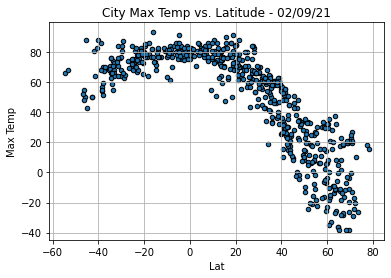

In [10]:
lat_temp = weather_data.plot(kind="scatter", x ="Lat", y="Max Temp", edgecolor="black", grid = True,
                            title="City Max Temp vs. Latitude - 02/09/21") 
plt.savefig("Temp_vs_Lat.png")


This plot is looking at the maximum temperature of cities versus latitude.  It shows the maximum temperature rising
as latitude approaches the equator and then decreasing as latitude increases and we move away from the equator.

## Latitude vs. Humidity Plot

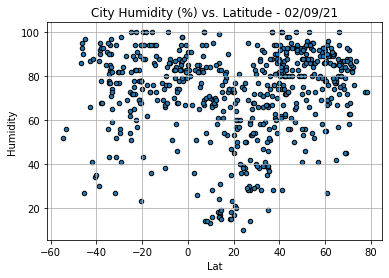

In [11]:
lat_humidity = weather_data.plot(kind="scatter", x ="Lat", y="Humidity", edgecolor="black", grid = True, 
                             title="City Humidity (%) vs. Latitude - 02/09/21")
plt.savefig("Humidity_vs_Latitude.png")

This plot shows the humidity of the cities versus latitude.  There doesn't appear to be a strong correlation between 
humidity and latitude.

## Latitude vs. Cloudiness Plot

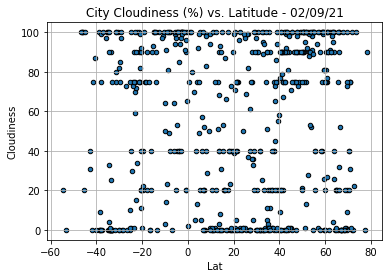

In [12]:
lat_cloud = weather_data.plot(kind="scatter", x ="Lat", y="Cloudiness", edgecolor="black", grid = True, 
                             title="City Cloudiness (%) vs. Latitude - 02/09/21")
plt.savefig("Cloudiness_vs_Latitude.png")

This plot shows cloudiness versus latitude.  It does not show a correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

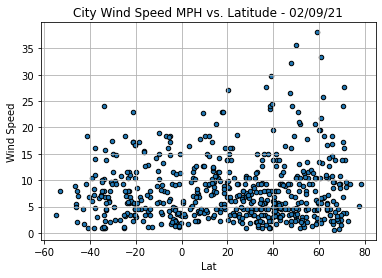

In [13]:
lat_wind = weather_data.plot(kind="scatter", x ="Lat", y="Wind Speed", edgecolor="black", grid = True, 
                             title="City Wind Speed MPH vs. Latitude - 02/09/21")
plt.savefig("Wind_vs_Lat.png")

This plot shows wind speed versus latitude. It does not show a correlation between wind speed and latitude.

## Linear Regression

In [32]:
north_weather_data = weather_data[weather_data['Lat'] >= 0]
north_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,4.190000e+02
mean,38.789112,12.753474,39.460358,70.420048,52.145585,8.289117,1.612899e+09
std,19.544044,86.951900,33.752764,21.434002,40.355363,6.152352,2.898277e+02
min,0.133300,-179.166700,-38.200000,10.000000,0.000000,0.580000,1.612899e+09
25%,22.687100,-70.829300,15.190000,58.500000,2.500000,3.860000,1.612899e+09
50%,39.816100,19.934800,45.000000,76.000000,58.000000,6.910000,1.612899e+09
75%,54.521300,83.780750,68.595000,86.500000,90.000000,10.435000,1.612900e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,38.050000,1.612900e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation Coefficient is: -0.8813893566801015


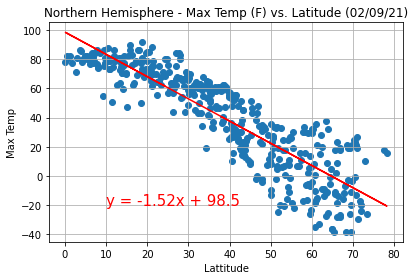

In [15]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Temp_vs_Lat.png")
plt.show()


This linear regression shows the maximum temperature of cities in the northern hemisphere versus latitude.  As you
would expect, it shows a strong negative correlation between latitude and temperature - as latitude increases, 
temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
south_weather_data = weather_data[weather_data['Lat'] < 0]
south_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02
mean,-21.517578,35.540992,74.299774,76.559322,58.322034,7.662994,1.612899e+09
std,13.265574,96.237826,8.977494,16.636083,40.221874,5.145603,2.786102e+02
min,-54.800000,-175.200000,43.000000,23.000000,0.000000,1.010000,1.612899e+09
25%,-33.033300,-50.011900,69.240000,69.000000,20.000000,3.620000,1.612899e+09
50%,-21.207800,30.455000,76.550000,79.000000,75.000000,6.600000,1.612899e+09
75%,-9.656700,134.083300,80.600000,88.000000,99.000000,10.360000,1.612900e+09
max,-0.092100,175.933300,93.200000,100.000000,100.000000,24.160000,1.612900e+09


The Correlation Coefficient is: 0.5847406193177153


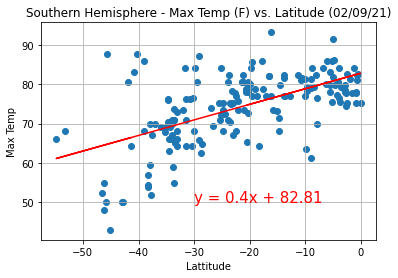

In [28]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude (02/09/21)")
plt.savefig("South_Temp_vs_Lat.png")
plt.grid()
plt.show()


This linear regression shows the maximum temperature of cities in the southern hemisphere versus latitude.  It shows a
slight to moderate positive correlation between temperature and latitude.  As latitude increases in the southern 
hemisphere and you move closer to the equator, temperatures tend to increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.3644338298552344


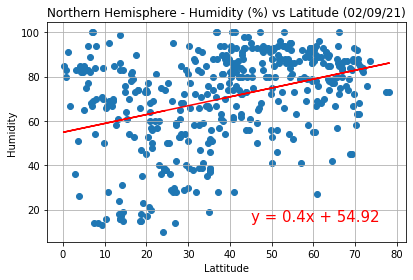

In [19]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Humidity_vs_Lat.png")
plt.show()

This linear regression shows humidity versus latitude in the northern hemisphere.  It shows a weak to slightly moderate
positive correlation between humidity and latitude.  As latitude increases, humidity may increase slightly.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.16233808067242797


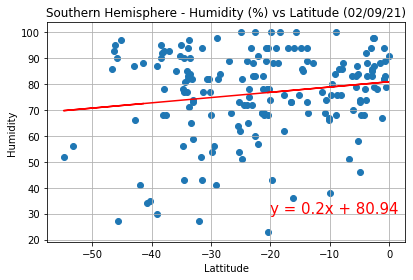

In [21]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Humidity (%) vs Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("South_Humidity_vs_Lat.png")
plt.show()

This linear regression shows the relationship between humidity vs latitude in the southern hemisphere.  It shows a
very weak correlation between humidity and latitude.  If we observe further we might find that latitude is not enough 
to indicate changes in humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.14600578032583925


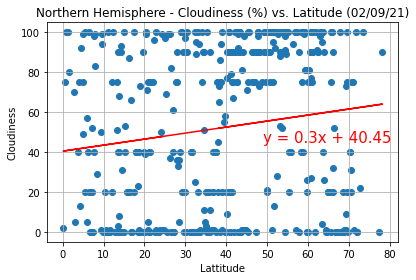

In [23]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(49,45),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Cloudiness_vs_Lat.png")
plt.show()

This linear regression shows the relationship between cloudiness and latitude in the northern hemisphere.  It shows a
weak correlation between cloudiness and latitude.  If we observe further we might find that latitude is not enough 
to indicate changes in cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.3035462553677432


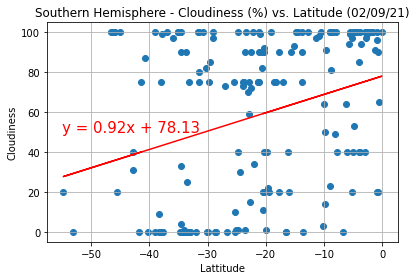

In [24]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("South_Cloudiness_vs_Lat.png")
plt.show()

This linear regression shows the relationship between cloudiness and latitude in the southern hemisphere.  It shows a
weak to slightly moderate correlation between cloudiness and latitude.  This indicates that as latitude increases in the southern hemisphere, cloudiness may increase as well.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.03203764309842901


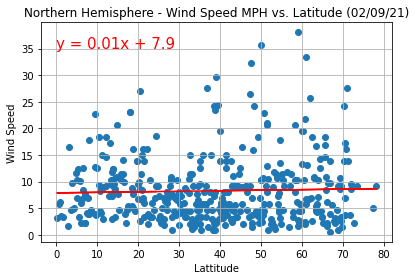

In [25]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Wind Speed MPH vs. Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Wind_vs_Lat.png")
plt.show()

This linear regression shows the relationship between wind speed and latitude in the northern hemisphere. It shows a 
very weak correlation between wind speed and latitude. If we observe further we might find that latitude is not enough
to contribute to wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.021381620654637796


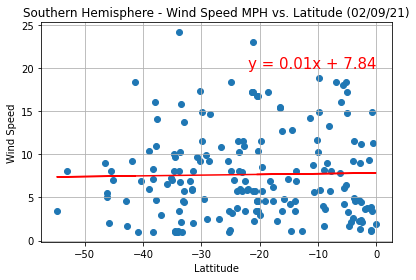

In [26]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Wind Speed MPH vs. Latitude (02/09/21)")
plt.tight_layout()
plt.grid()
plt.savefig("South_Wind_vs_Lat.png")
plt.show()

This linear regression shows the relationship between wind speed and latitude in the southern hemisphere. It shows a 
very weak correlation between wind speed and latitude. If we observe further we might find that latitude is not enough
to contribute to wind speed in the southern hemisphere.